# Part 1

## Part A

### Environment and Imports

In [4]:
# Checking Your Python Environment
import sys
import numpy as np
import scipy
import sklearn
import matplotlib
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# scikit-learn pereptron and adaline implementations
from sklearn.linear_model import Perceptron as SklearnPerceptron
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap
from sklearn.impute import SimpleImputer

# print active python version
print(f"Python version active:", sys.version)

# print active python interpreter
print(f"Python interpreter active:", sys.executable)

# print numpy version
print(f"numpy version:", np.__version__)

# print scipy version
print(f"scipy version:", scipy.__version__)

# print matplotlib version
print(f"matplotlib version:", matplotlib.__version__)

# print sklearn version
print(f"sklearn version:", sklearn.__version__)

# print pandas version
print(f"pandas version:", pd.__version__)

Python version active: 3.9.23 (main, Jun  5 2025, 13:25:08) [MSC v.1929 64 bit (AMD64)]
Python interpreter active: c:\Users\Breck\anaconda3\envs\DASC_MachineLearning\python.exe
numpy version: 1.21.2
scipy version: 1.7.0
matplotlib version: 3.4.3
sklearn version: 1.0
pandas version: 1.3.2


### Get Data

#### In google colab

In [5]:
# ### In Google Colab
# from pyomo.environ import *
# import os
# import pandas as pd
# from google.colab import files
# import io

# file_name = "project_adult.csv"
# file_name_2 = "project_validation_inputs.csv"

# # Remove existing file to prevent renaming
# if os.path.exists(file_name):
#     os.remove(file_name)
# if os.path.exists(file_name_2):
#   os.remove(file_name_2)

# # Upload the file
# df_all = files.upload()

# df = pd.read_csv(io.BytesIO(df_all['project_adult.csv'])) #replace your_file.csv with your file name
# validation_df = pd.read_csv(io.BytesIO(df_all['project_validation_inputs.csv']))

# df.head()
# validation_df.head()

#### In VS Code

In [ ]:
## VSCode
file_path = r'project_adult.csv'

try:
    df = pd.read_csv(file_path)
    print(f"Successfully loaded '{file_path}'. First 5 rows:")
    print(df.head())
    print(f"\n********************* \nDataset Shape: {df.shape} \n********************* \nDataset Columns: \n{df.columns}\n********************* \nData Description: \n{df.describe()} \n********************* \nDoes Data Contain Null Values \n{df.isnull().all()}")
    print(f"\n********************* \n Counts of Response Variables: \n {df.iloc[:,4].value_counts()}")
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found.")
except pd.errors.EmptyDataError:
    print(f"Error: The file '{file_path}' is empty or contains no data.")
except pd.errors.ParserError as e:
    print(f"Error: A parsing error occurred while reading '{file_path}': {e}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

file_path = r'project_validation_inputs.csv'

try:
    validation_df = pd.read_csv(file_path)
    print(f"Successfully loaded '{file_path}'. First 5 rows:")
    print(df.head())
    print(f"\n********************* \nDataset Shape: {validation_df.shape} \n********************* \nDataset Columns: \n{validation_df.columns}\n********************* \nData Description: \n{validation_df.describe()} \n********************* \nDoes Data Contain Null Values \n{validation_df.isnull().all()}")
    print(f"\n********************* \n Counts of Response Variables: \n {validation_df.iloc[:,4].value_counts()}")
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found.")
except pd.errors.EmptyDataError:
    print(f"Error: The file '{file_path}' is empty or contains no data.")
except pd.errors.ParserError as e:
    print(f"Error: A parsing error occurred while reading '{file_path}': {e}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Successfully loaded 'Data\project_adult.csv'. First 5 rows:


   Unnamed: 0  age         workclass  fnlwgt     education  education-num  \
0        5514   33         Local-gov  198183     Bachelors             13   
1       19777   36           Private   86459     Assoc-voc             11   
2       10781   58  Self-emp-not-inc  203039           9th              5   
3       32240   21           Private  180190     Assoc-voc             11   
4        9876   27           Private  279872  Some-college             10   

       marital-status       occupation   relationship   race     sex  \
0       Never-married   Prof-specialty  Not-in-family  White  Female   
1  Married-civ-spouse  Exec-managerial        Husband  White    Male   
2           Separated     Craft-repair  Not-in-family  White    Male   
3  Married-civ-spouse  Farming-fishing        Husband  White    Male   
4            Divorced    Other-service  Not-in-family  White    Male   

   capital-gain  capital-loss  hours-per-week native-country income  
0             0             0     

## Preprocess Data

In [7]:
# Handle missing values
# Imputing numeric
imputer = SimpleImputer(strategy='mean')  # or 'mean'
numeric_cols = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
df[numeric_cols] = imputer.fit_transform(df[numeric_cols])
validation_df[numeric_cols] = imputer.transform(validation_df[numeric_cols])

# Imputing categorical
categorical_cols=['workclass','education','marital-status','occupation','relationship','race','sex','native-country']
categorical_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = categorical_imputer.fit_transform(df[categorical_cols])
validation_df[categorical_cols] = categorical_imputer.transform(validation_df[categorical_cols])

df = df.iloc[:, 1:]
validation_df = validation_df.iloc[:, 1:]

In [8]:
# Split in X and y
y = df['income']
X = df.drop('income', axis=1)
validation_X = validation_df

In [9]:
# Map y to int values
y = y.map({'<=50K': 0, '>50K': 1})

In [10]:
# Scale Numeric
numeric_cols = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
scaler = StandardScaler()
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])
validation_scaler = StandardScaler()
validation_X[numeric_cols] = validation_scaler.fit_transform(validation_X[numeric_cols])

In [11]:
# Encode Categorical
# Concatenate train + validation
combined = pd.concat([X, validation_X], axis=0)

# One-hot encode together so they get the same dummy columns
combined = pd.get_dummies(combined, columns=[
    'workclass','education','marital-status',
    'occupation','relationship','race','sex','native-country'
])

# Split back into X and validation_X
X = combined.iloc[:len(X), :]
validation_X = combined.iloc[len(X):, :]

# Convert to numpy
X = X.to_numpy().astype(float)
validation_X = validation_X.to_numpy().astype(float)

In [12]:
# create train, test, and validation datasets
# modified book code to use traditional use of train, test, and validation
#    means switched naming schemes of test and validation from original code
from sklearn.model_selection import train_test_split

X_temp, X_valid, y_temp, y_valid = train_test_split(
    X, y, test_size=10000, random_state=123, stratify=y)

X_train, X_test, y_train, y_test = train_test_split(
    X_temp, y_temp, test_size=5000, random_state=123, stratify=y_temp)

# optional to free up some memory by deleting non-used arrays:
del X_temp, y_temp, X, y

y_train = y_train.values
y_test = y_test.values

## Part b

### Model Class Implementation

In [13]:
# this is what author uses to create "model"
def sigmoid(z):
    return 1. / (1. + np.exp(-z))


def int_to_onehot(y, num_labels):

    ary = np.zeros((y.shape[0], num_labels))
    for i, val in enumerate(y):
        ary[i, val] = 1

    return ary


class NeuralNetMLP:

    def __init__(self, num_features, num_hidden, num_classes, random_seed=123):
        super().__init__()

        self.num_classes = num_classes

        # hidden
        rng = np.random.RandomState(random_seed)

        self.weight_h = rng.normal(
            loc=0.0, scale=0.1, size=(num_hidden, num_features))
        self.bias_h = np.zeros(num_hidden)

        # output
        self.weight_out = rng.normal(
            loc=0.0, scale=0.1, size=(num_classes, num_hidden))
        self.bias_out = np.zeros(num_classes)

    def forward(self, x):
        # Hidden layer
        # input dim: [n_examples, n_features] dot [n_hidden, n_features].T
        # output dim: [n_examples, n_hidden]
        z_h = np.dot(x, self.weight_h.T) + self.bias_h
        a_h = sigmoid(z_h)

        # Output layer
        # input dim: [n_examples, n_hidden] dot [n_classes, n_hidden].T
        # output dim: [n_examples, n_classes]
        z_out = np.dot(a_h, self.weight_out.T) + self.bias_out
        a_out = sigmoid(z_out)
        return a_h, a_out

    def backward(self, x, a_h, a_out, y):

        # onehot encoding
        y_onehot = int_to_onehot(y, self.num_classes)

        # Part 1: dLoss/dOutWeights
        ## = dLoss/dOutAct * dOutAct/dOutNet * dOutNet/dOutWeight
        ## where DeltaOut = dLoss/dOutAct * dOutAct/dOutNet
        ## for convenient re-use

        # input/output dim: [n_examples, n_classes]
        d_loss__d_a_out = 2.*(a_out - y_onehot) / y.shape[0]

        # input/output dim: [n_examples, n_classes]
        d_a_out__d_z_out = a_out * (1. - a_out) # sigmoid derivative

        # output dim: [n_examples, n_classes]
        delta_out = d_loss__d_a_out * d_a_out__d_z_out # "delta (rule) placeholder"

        # gradient for output weights

        # [n_examples, n_hidden]
        d_z_out__dw_out = a_h

        # input dim: [n_classes, n_examples] dot [n_examples, n_hidden]
        # output dim: [n_classes, n_hidden]
        d_loss__dw_out = np.dot(delta_out.T, d_z_out__dw_out)
        d_loss__db_out = np.sum(delta_out, axis=0)


        #################################
        # Part 2: dLoss/dHiddenWeights
        ## = DeltaOut * dOutNet/dHiddenAct * dHiddenAct/dHiddenNet * dHiddenNet/dWeight

        # [n_classes, n_hidden]
        d_z_out__a_h = self.weight_out

        # output dim: [n_examples, n_hidden]
        d_loss__a_h = np.dot(delta_out, d_z_out__a_h)

        # [n_examples, n_hidden]
        d_a_h__d_z_h = a_h * (1. - a_h) # sigmoid derivative

        # [n_examples, n_features]
        d_z_h__d_w_h = x

        # output dim: [n_hidden, n_features]
        d_loss__d_w_h = np.dot((d_loss__a_h * d_a_h__d_z_h).T, d_z_h__d_w_h)
        d_loss__d_b_h = np.sum((d_loss__a_h * d_a_h__d_z_h), axis=0)

        return (d_loss__dw_out, d_loss__db_out,
                d_loss__d_w_h, d_loss__d_b_h)

Initalizing the model

In [14]:
# create model of the class NeuralNetMLP
model = NeuralNetMLP(num_features=108,
                     num_hidden=50,
                     num_classes=10)

Using minibatch

In [15]:
# defines data laoders as minibatch
import numpy as np

num_epochs = 50
minibatch_size = 100

def minibatch_generator(X, y, minibatch_size):
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)

    for start_idx in range(0, indices.shape[0] - minibatch_size
                           + 1, minibatch_size):
        batch_idx = indices[start_idx:start_idx + minibatch_size]

        yield X[batch_idx], y[batch_idx]


# iterate over training epochs
for i in range(num_epochs):

    # iterate over minibatches
    minibatch_gen = minibatch_generator(
        X_train, y_train, minibatch_size)

    for X_train_mini, y_train_mini in minibatch_gen:

        break

    break

print(X_train_mini.shape)
print(y_train_mini.shape)

(100, 108)
(100,)


In [16]:
print(X_test.shape)
print(X_train.shape)

(5000, 108)
(11048, 108)


Creating helper functions for calculating loss and accuracy

In [17]:
# create functions to compute loss and accuracy
# modified to use traditional use of train, test, and valid
def mse_loss(targets, probas, num_labels=10):
    onehot_targets = int_to_onehot(targets, num_labels=num_labels)
    return np.mean((onehot_targets - probas)**2)


def accuracy(targets, predicted_labels):
    return np.mean(predicted_labels == targets)


_, probas = model.forward(X_test)
mse = mse_loss(y_test, probas)

predicted_labels = np.argmax(probas, axis=1)
acc = accuracy(y_test, predicted_labels)

print(f'Initial test MSE: {mse:.1f}')
print(f'Initial test accuracy: {acc*100:.1f}%')

Initial test MSE: 0.3
Initial test accuracy: 0.0%


In [18]:
# create function that computes MSE and accuracy based on the minibatch
def compute_mse_and_acc(nnet, X, y, num_labels=10, minibatch_size=100):
    mse, correct_pred, num_examples = 0., 0, 0
    minibatch_gen = minibatch_generator(X, y, minibatch_size)

    for i, (features, targets) in enumerate(minibatch_gen):

        _, probas = nnet.forward(features)
        predicted_labels = np.argmax(probas, axis=1)

        onehot_targets = int_to_onehot(targets, num_labels=num_labels)
        loss = np.mean((onehot_targets - probas)**2)
        correct_pred += (predicted_labels == targets).sum()

        num_examples += targets.shape[0]
        mse += loss

    mse = mse/(i+1)
    acc = correct_pred/num_examples
    return mse, acc

Calculating loss on model with untrained initialized weights

In [19]:
# compute the MSE and ACC based on the model for the validation dataset
# this provides a pre training evaluation of the model of test before training
mse, acc = compute_mse_and_acc(model, X_test, y_test)
print(f'Initial test MSE: {mse:.1f}')
print(f'Initial test accuracy: {acc*100:.1f}%')

Initial test MSE: 0.3
Initial test accuracy: 0.0%


In [20]:
# function to train "model" based on the training and test data to find weights that improves performance
def train(model, X_train, y_train, X_test, y_test, num_epochs,
          learning_rate=0.1):
    epoch_loss = []
    epoch_train_acc = []
    epoch_test_acc = []

    for e in range(num_epochs):
        # iterate over minibatches
        minibatch_gen = minibatch_generator(
            X_train, y_train, minibatch_size)

        for X_train_mini, y_train_mini in minibatch_gen:

            #### Compute outputs ####
            a_h, a_out = model.forward(X_train_mini)

            #### Compute gradients ####
            d_loss__d_w_out, d_loss__d_b_out, d_loss__d_w_h, d_loss__d_b_h = \
                model.backward(X_train_mini, a_h, a_out, y_train_mini)

            #### Update weights ####
            model.weight_h -= learning_rate * d_loss__d_w_h
            model.bias_h -= learning_rate * d_loss__d_b_h
            model.weight_out -= learning_rate * d_loss__d_w_out
            model.bias_out -= learning_rate * d_loss__d_b_out

        #### Epoch Logging ####
        train_mse, train_acc = compute_mse_and_acc(model, X_train, y_train)
        test_mse, test_acc = compute_mse_and_acc(model, X_test, y_test)
        train_acc, test_acc = train_acc*100, test_acc*100
        epoch_train_acc.append(train_acc)
        epoch_test_acc.append(test_acc)
        epoch_loss.append(train_mse)
        # print(f'Epoch: {e+1:03d}/{num_epochs:03d} '
        #       f'| Train MSE: {train_mse:.2f} '
        #       f'| Train Acc: {train_acc:.2f}% '
        #       f'| Test Acc: {test_acc:.2f}%')
    return epoch_loss, epoch_train_acc, epoch_test_acc

### Training base model

In [21]:
# performing training of "model" on training and test data
np.random.seed(123) # for the training set shuffling

epoch_loss, epoch_train_acc, epoch_test_acc = train(
    model, X_train, y_train, X_test, y_test,
    num_epochs=50, learning_rate=0.1)
print(f'Final Epoch: '
              f'| Train MSE: {epoch_loss[-1]:.2f} '
              f'| Train Acc: {epoch_train_acc[-1]:.2f}% '
              f'| Test Acc: {epoch_test_acc[-1]:.2f}%')


Final Epoch: | Train MSE: 0.02 | Train Acc: 84.74% | Test Acc: 84.64%


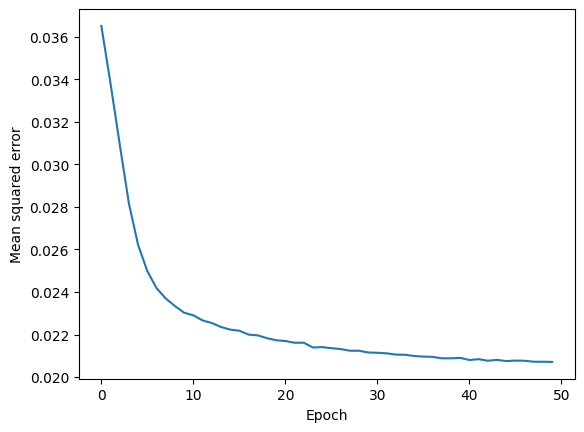

In [22]:
# evaluate MLP with minibatch performance
# plot Epoch vs MSE
plt.plot(range(len(epoch_loss)), epoch_loss)
plt.ylabel('Mean squared error')
plt.xlabel('Epoch')
#plt.savefig('figures/11_07.png', dpi=300)
plt.show()

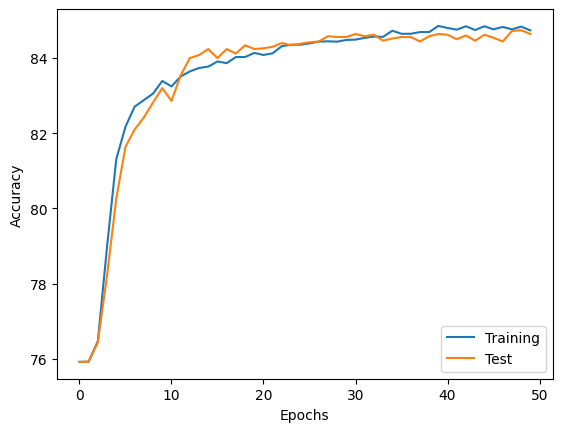

In [23]:
# plot Epoch vs accuracy for training and validation test
plt.plot(range(len(epoch_train_acc)), epoch_train_acc,
         label='Training')
plt.plot(range(len(epoch_test_acc)), epoch_test_acc,
         label='Test')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(loc='lower right')
#plt.savefig('figures/11_08.png', dpi=300)
plt.show()

## Hyperparameter Tuning

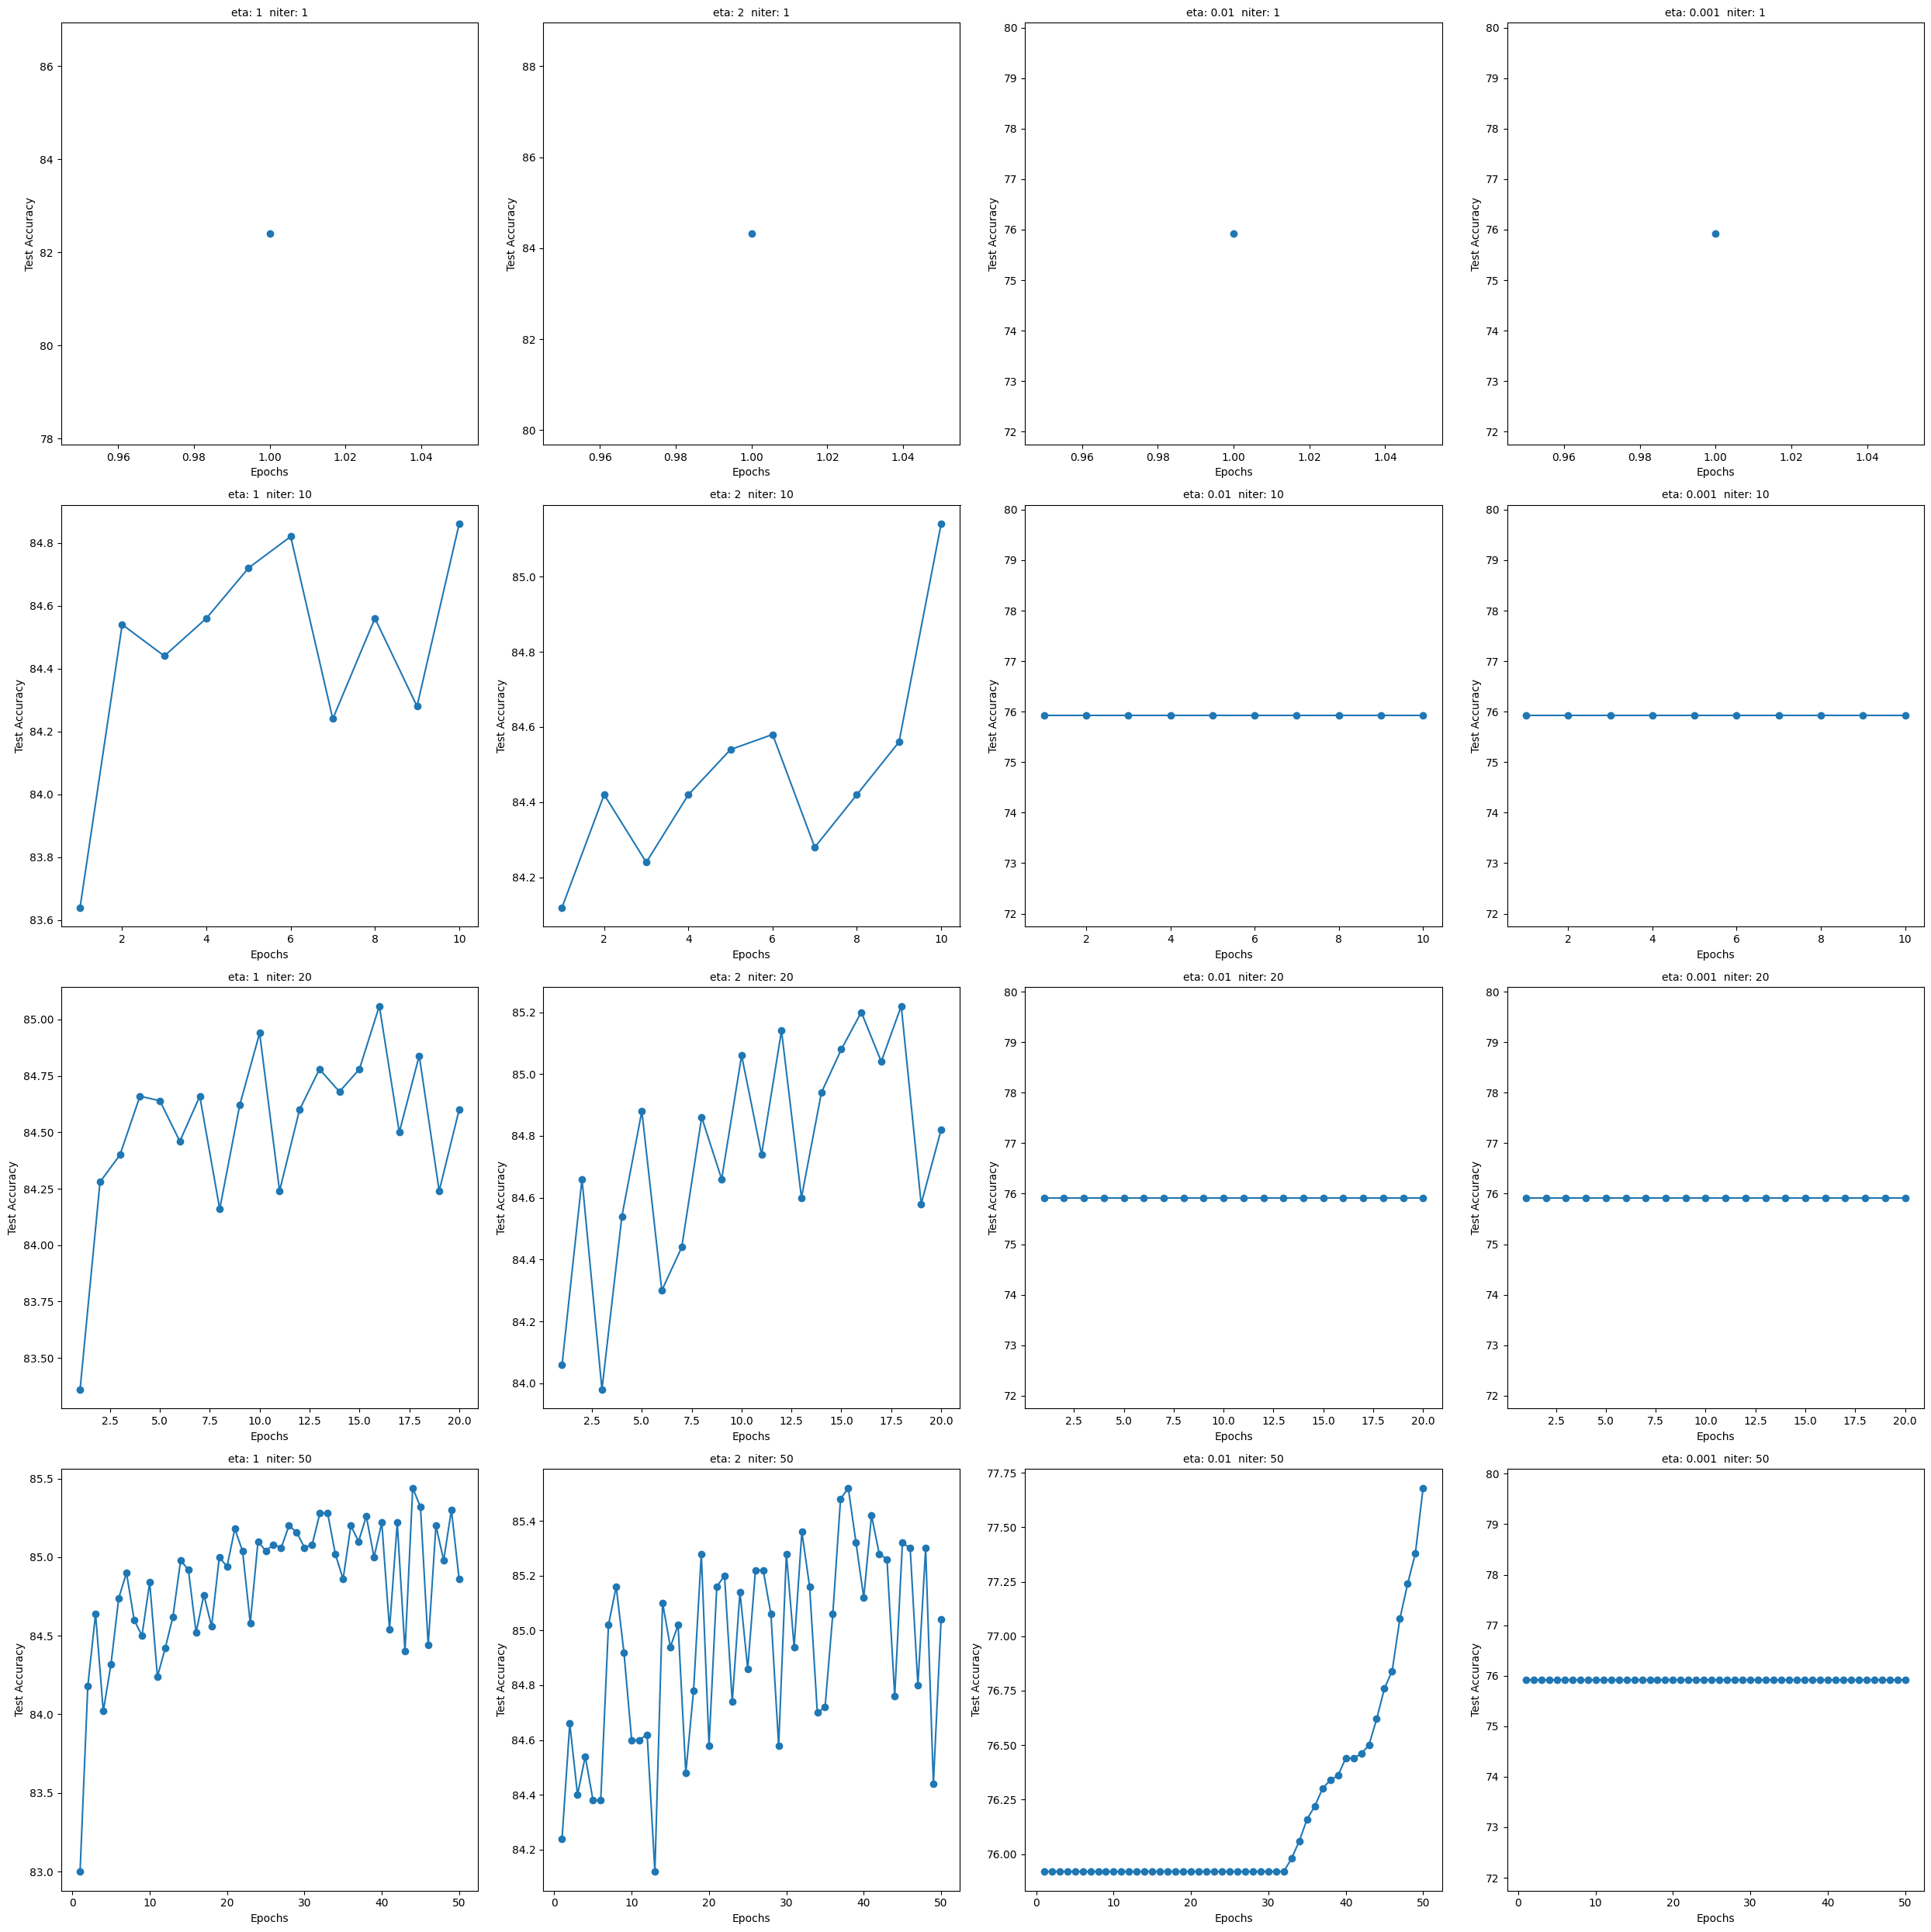

In [24]:
# Visual Tuning
fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(25, 25), squeeze=False)

list_eta = [1, 2, .01, .001]
list_niter = [1, 10, 20, 50]

for row_idx, j in enumerate(list_niter):
    for col_idx, i in enumerate(list_eta):
        # Initialize new model
        model = NeuralNetMLP(num_features=108, num_hidden=25, num_classes=10)
        epoch_loss, epoch_train_acc, epoch_test_acc = train(
            model, X_train, y_train, X_test, y_test,
            num_epochs=j, learning_rate=i)

        # Use integer indices for ax
        ax[row_idx, col_idx].plot(range(1, len(epoch_test_acc) + 1), epoch_test_acc, marker='o')
        ax[row_idx, col_idx].set_xlabel('Epochs', fontsize=10)
        ax[row_idx, col_idx].set_ylabel('Test Accuracy', fontsize=10)
        ax[row_idx, col_idx].set_title(f"eta: {i}  niter: {j}", fontsize=10)

plt.tight_layout()
plt.show()


In [25]:
### Iterate hrough different hyperparameters
list_eta = [1, .1, 0.01, 0.001]
list_niter = [1, 10, 25, 50]
list_hidden = [1, 5, 10, 50]

mlp_nums = []
print("MLP Search Search")
for i in list_eta:
    for j in list_niter:
        for k in list_hidden:
            # Initialize new model
            model = NeuralNetMLP(num_features=108, num_hidden=k, num_classes=10)
            epoch_loss, epoch_train_acc, epoch_test_acc = train(
                model, X_train, y_train, X_test, y_test,
                num_epochs=j, learning_rate=i)

            print(f"MLP accuracy with n_iter={j} and eta={i} and hidden_layers={k}: {epoch_test_acc[-1]:.4f}")
            mlp_nums.append((i,j,k,epoch_test_acc[-1]))

MLP Search Search
MLP accuracy with n_iter=1 and eta=1 and hidden_layers=1: 75.9200
MLP accuracy with n_iter=1 and eta=1 and hidden_layers=5: 77.8600
MLP accuracy with n_iter=1 and eta=1 and hidden_layers=10: 81.3200
MLP accuracy with n_iter=1 and eta=1 and hidden_layers=50: 83.6400
MLP accuracy with n_iter=10 and eta=1 and hidden_layers=1: 84.6400
MLP accuracy with n_iter=10 and eta=1 and hidden_layers=5: 84.6800
MLP accuracy with n_iter=10 and eta=1 and hidden_layers=10: 84.2200
MLP accuracy with n_iter=10 and eta=1 and hidden_layers=50: 84.6000
MLP accuracy with n_iter=25 and eta=1 and hidden_layers=1: 84.4600
MLP accuracy with n_iter=25 and eta=1 and hidden_layers=5: 84.8600
MLP accuracy with n_iter=25 and eta=1 and hidden_layers=10: 84.9400
MLP accuracy with n_iter=25 and eta=1 and hidden_layers=50: 85.0800
MLP accuracy with n_iter=50 and eta=1 and hidden_layers=1: 84.4600
MLP accuracy with n_iter=50 and eta=1 and hidden_layers=5: 85.3800
MLP accuracy with n_iter=50 and eta=1 and 

In [26]:
max_accuracy = -1
max_index = -2
for i in range(len(mlp_nums)):
  if mlp_nums[i][3] > max_accuracy:
    max_accuracy = mlp_nums[i][3]
    max_index = i
    print(mlp_nums[i])
print(f"Best MLP Accuracy: {max_accuracy:.2f}")
print(f"""Best MLP Hyperparameters:
  learning rate = {mlp_nums[max_index][0]}
  epochs = {mlp_nums[max_index][1]}
  hidden layers = {mlp_nums[max_index][2]}
  """)


(1, 1, 1, 75.92)
(1, 1, 5, 77.86)
(1, 1, 10, 81.32000000000001)
(1, 1, 50, 83.64)
(1, 10, 1, 84.64)
(1, 10, 5, 84.68)
(1, 25, 5, 84.86)
(1, 25, 10, 84.94)
(1, 25, 50, 85.08)
(1, 50, 5, 85.38)
(1, 50, 50, 85.44)
Best MLP Accuracy: 85.44
Best MLP Hyperparameters:
  learning rate = 1
  epochs = 50
  hidden layers = 50
  


## Validation Creation

Training validation model based on best results from hyperparameter tuning

In [27]:
np.random.seed(123)
model = NeuralNetMLP(num_features=108, num_hidden=mlp_nums[max_index][2], num_classes=10)
epoch_loss, epoch_train_acc, epoch_test_acc = train(
  model, X_train, y_train, X_test, y_test,
  num_epochs=mlp_nums[max_index][1], learning_rate=mlp_nums[max_index][0])

print(f'Final Epoch: '
              f'| Train MSE: {epoch_loss[-1]:.2f} '
              f'| Train Acc: {epoch_train_acc[-1]:.2f}% '
              f'| Test Acc: {epoch_test_acc[-1]:.2f}%')


_, probas = model.forward(validation_X)

predicted_labels = np.argmax(probas, axis=1)


Final Epoch: | Train MSE: 0.02 | Train Acc: 86.13% | Test Acc: 85.40%


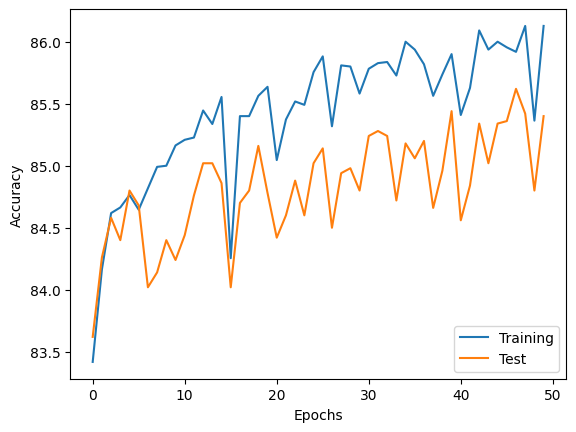

In [28]:
# plot Epoch vs accuracy for training and validation test
plt.plot(range(len(epoch_train_acc)), epoch_train_acc,
         label='Training')
plt.plot(range(len(epoch_test_acc)), epoch_test_acc,
         label='Test')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(loc='lower right')
#plt.savefig('figures/11_08.png', dpi=300)
plt.show()

In [29]:
for i in range(len(predicted_labels)):
  if predicted_labels[i] == 0:
    predicted_labels[i] = -1
validation_output = pd.DataFrame(predicted_labels, columns=['prediction'])
validation_output.to_csv('Group_6_MLP_PredictedOutputs.csv', index=False)

# Part 2: Reflection and Conceptual Questions

## a. Architecture Choice

We chose a single hidden layer with 50 neurons and a sigmoid activation function.
This setup balanced complexity and performance without overfitting the dataset.
The sigmoid activation worked well because our target variable is binary (>50K vs ≤50K), and sigmoid outputs map cleanly between 0 and 1.
We tested different learning rates and hidden layer sizes, and this configuration provided the most stable accuracy on both training and test data.

## b. Monitoring and Mitigating Overfitting

To monitor overfitting, we tracked training and test accuracy over multiple epochs and compared their trends.
If training accuracy increased while test accuracy decreased, that indicated overfitting.
We mitigated it by keeping the network relatively shallow, using a moderate learning rate (0.1), and performing hyperparameter tuning across learning rates, epochs, and hidden neurons.
We also used separate validation and test splits, which helped ensure the model generalized well to unseen data.

## c. Ethical Concerns

The UCI Adult Income dataset includes sensitive features such as race, gender, and marital status.
A key ethical concern is that models trained on this data could amplify existing societal biases in income predictions.
For instance, if certain groups are historically underrepresented in high-income categories, the model might learn biased associations.
Ethically deploying this type of model would require bias testing, transparency in model use, and possibly removing or reweighting sensitive attributes to reduce discrimination.

## d. Importance of Activation Functions

Activation functions are essential because they introduce nonlinearity, allowing the neural network to learn complex decision boundaries.
Without activation functions, the model would behave like a linear regression and fail to capture real-world relationships between features and income level.
In our case, the sigmoid activation gave smooth, differentiable outputs that worked well for binary classification and gradient-based optimization.